In [9]:
import pandas as pd 
import numpy as np
import warnings
#SVM library
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm

import itertools

#Matplot
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

#stat visualizer
import seaborn as sns







In [14]:
df=  pd.read_csv('mental_health_workplace_survey.csv')
df.head()

,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,...,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,...,117,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,...,8,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,...,75,No,3.63,No,6,80K-100K,7.28,7,7.96,1
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,...,43,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,...,58,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1


In [4]:
# Shape of the dataset
print("Total Rows:", df.shape[0])
print("Total Columns:", df.shape[1])

# Check data types and non-null counts
df.info()

# Check summary statistics for numeric columns
df.describe()

Total Rows: 3001
Total Columns: 25
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3001 non-null   object
 1   1       3001 non-null   object
 2   2       3001 non-null   object
 3   3       3001 non-null   object
 4   4       3001 non-null   object
 5   5       3001 non-null   object
 6   6       3001 non-null   object
 7   7       3001 non-null   object
 8   8       3001 non-null   object
 9   9       3001 non-null   object
 10  10      3001 non-null   object
 11  11      3001 non-null   object
 12  12      3001 non-null   object
 13  13      3001 non-null   object
 14  14      3001 non-null   object
 15  15      3001 non-null   object
 16  16      3001 non-null   object
 17  17      3001 non-null   object
 18  18      3001 non-null   object
 19  19      3001 non-null   object
 20  20      3001 non-null   object
 21  21      3001 non-null   o

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
count,3001,3001,3001,3001,3001,3001,3001,3001,3001,3001,...,3001,3001,3001,3001,3001,3001,3001,3001,3001,3001
unique,3001,39,5,8,9,7,22,31,4,864,...,121,3,864,3,11,6,874,50,867,3
top,4000,56,Non-binary,India,Data Scientist,HR,15,55,Hybrid,6.88,...,58,No,4.3,No,6,100K+,7.02,34,6.84,0
freq,1,99,757,464,411,525,187,115,1022,9,...,37,1531,10,1511,325,640,9,78,12,2020


In [16]:
df.isnull().sum().sort_values(ascending=False)

EmployeeID                0
Age                       0
Gender                    0
Country                   0
JobRole                   0
Department                0
YearsAtCompany            0
WorkHoursPerWeek          0
RemoteWork                0
BurnoutLevel              0
JobSatisfaction           0
StressLevel               0
ProductivityScore         0
SleepHours                0
PhysicalActivityHrs       0
CommuteTime               0
HasMentalHealthSupport    0
ManagerSupportScore       0
HasTherapyAccess          0
MentalHealthDaysOff       0
SalaryRange               0
WorkLifeBalanceScore      0
TeamSize                  0
CareerGrowthScore         0
BurnoutRisk               0
dtype: int64

In [6]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)  # Replaces missing values with median
    print(f"Filled missing values in {col} with median: {median_val}")

# Handle categorical columns (object/string)
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)    # Replaces missing values with most frequent value
    print(f"Filled missing values in {col} with mode: {mode_val}")

Filled missing values in 0 with mode: 1001
Filled missing values in 1 with mode: 56
Filled missing values in 2 with mode: Non-binary
Filled missing values in 3 with mode: India
Filled missing values in 4 with mode: Data Scientist
Filled missing values in 5 with mode: HR
Filled missing values in 6 with mode: 15
Filled missing values in 7 with mode: 55
Filled missing values in 8 with mode: Hybrid
Filled missing values in 9 with mode: 5.45
Filled missing values in 10 with mode: 4.27
Filled missing values in 11 with mode: 1.63
Filled missing values in 12 with mode: 4.69
Filled missing values in 13 with mode: 7.4
Filled missing values in 14 with mode: 3.3
Filled missing values in 15 with mode: 58
Filled missing values in 16 with mode: No
Filled missing values in 17 with mode: 4.3
Filled missing values in 18 with mode: No
Filled missing values in 19 with mode: 6
Filled missing values in 20 with mode: 100K+
Filled missing values in 21 with mode: 1.92
Filled missing values in 22 with mode: 34


/tmp/ipykernel_38383/850134027.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)    # Replaces missing values with most frequent value


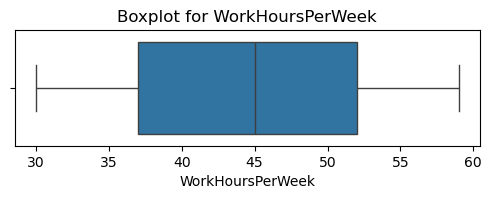

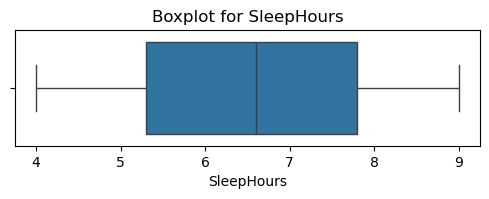

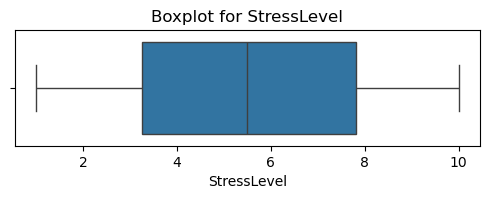

In [15]:
# Plot boxplots for key numeric features
features = ['WorkHoursPerWeek', 'SleepHours', 'StressLevel']
for col in features:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(data = df, x=col)
    plt.title(f"Boxplot for {col}")
    plt.show()

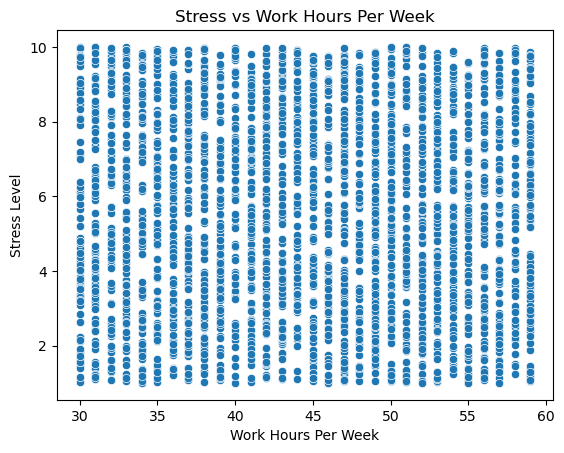

In [19]:

if 'StressLevel' in df.columns and 'WorkHoursPerWeek' in df.columns:
    sns.scatterplot(data=df, x='WorkHoursPerWeek', y='StressLevel')
    plt.title("Stress vs Work Hours Per Week")
    plt.xlabel("Work Hours Per Week")
    plt.ylabel("Stress Level")
    plt.savefig("stress_vs_workhours.png")
    plt.show()
else:
    print("Cannot plot — 'WorkHoursPerWeek' or 'StressLevel' not found.")